In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
import numpy as np
import pandas as pd

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro, kstest, pearsonr
import numpy as np

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt   # 그래프 출력시
import matplotlib as mpl    # 그래프 옵션
import warnings
warnings.filterwarnings('ignore')

# 그래프 시각화 옵션 설정함수
%matplotlib inline

# 선명하게 출력
#set_matplotlib_formats('retina')

# 그래프에서 음수 값이 나올 때, 깨지는 현상 방지
mpl.rc('axes',unicode_minus=False)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from plotnine import *

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/train_V2.csv')
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,9e5fbba13ebe19,1c200aab6dad9b,92db29f073548e,0,0,80.80,0,0,0,58,...,1,0.0000,0,0.00,1,0,1135.00,2,1653,0.4643
1048571,1928469d37a196,e541681c9bf27e,c6e91c362490b8,0,3,184.60,0,0,2,27,...,0,995.0000,0,0.00,0,0,2324.00,9,0,0.9381
1048572,5b2b9abc0f64c2,2161ff6847bf15,beedba7c361349,0,4,181.50,1,0,1,20,...,0,1395.0000,0,0.00,0,0,2153.00,4,1461,0.8400
1048573,91c7c010d76ffd,76cc253f07943d,a7d9c6edf0121f,0,0,100.00,1,1,0,42,...,0,0.0000,0,0.00,0,0,81.39,3,0,0.0370


In [ ]:
df = df[df["matchType"]== "duo"]
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0,0,0.000,0,0,161.8,2,0,0.7755
23,0b6fbdfb59c994,7a75c3e86934f6,8b0a78c005cea0,0,6,1011.00,6,2,2,2,...,0,4860.0,0,0.000,0,0,2727.0,7,1603,0.9592
29,ac5b57ff39979c,857cc55b2b6001,e019e04dee4f19,0,0,0.00,0,0,0,87,...,0,0.0,0,0.000,0,0,0.0,0,0,0.0000
30,3a4e362d28f411,b4fbf11bf33ac3,cf3d655571b26b,0,0,36.73,0,0,0,62,...,0,0.0,0,0.000,0,0,455.5,5,0,0.4255
32,e050d1f179d289,9e9fc09bcdab3f,bf3065e01dd3f9,0,3,0.00,0,0,1,61,...,0,1154.0,0,0.000,1,0,1240.0,7,0,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048505,dd0792c2382d3f,1da0e49262bd7e,8c6fcff081e32f,0,0,136.60,1,0,0,20,...,0,0.0,0,0.000,0,0,815.6,3,0,0.4091
1048522,5912758f70b054,e34e05ecf8f138,c153643b42fa17,0,1,157.40,0,1,1,27,...,0,206.4,0,2.497,0,0,2027.0,5,0,0.7021
1048534,3d7082ddde5489,c43d939cc5bc80,b1b2ce6da85806,0,0,0.00,0,0,0,64,...,0,0.0,0,0.000,0,0,509.6,2,0,0.3333
1048540,2f3d1cc6e1eaaf,44f4723622b98d,9d4dc128fb6130,0,3,27.31,0,0,0,60,...,0,3541.0,0,0.000,0,0,819.5,4,1640,0.5000


In [ ]:
df = df.reset_index()
df = df.drop(['index'], axis = 1)
seed = 5764
Y = df['winPlacePerc']
df.drop(['Id', 'groupId', 'matchType' , 'maxPlace','matchId', 'rankPoints', 'killPoints', 'winPoints','winPlacePerc'], axis = 1, inplace = True)
df = pd.DataFrame(MinMaxScaler().fit_transform(df))
df.columns = ['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills','heals','killPlace','kills','killStreaks','longestKill','matchDuration','numGroups', 'revives', 'rideDistance','roadKills', 'swimDistance','teamKills','vehicleDestroys','walkDistance','weaponsAcquired']
X = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(51457, 20) (22054, 20) (51457,) (22054,)


In [ ]:
df

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchDuration,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired
0,0.142857,0.000000,0.030155,0.0000,0.000000,0.000000,0.464646,0.000000,0.000000,0.000000,0.133072,0.90625,0.0,0.000000,0.0,0.000000,0.0,0.0,0.016493,0.015625
1,0.000000,0.315789,0.448337,0.3750,0.133333,0.032787,0.010101,0.428571,0.285714,0.186619,0.660470,0.84375,0.0,0.245207,0.0,0.000000,0.0,0.0,0.277982,0.054688
2,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.868687,0.000000,0.000000,0.000000,0.340509,0.81250,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,0.000000,0.000000,0.016288,0.0000,0.000000,0.000000,0.616162,0.000000,0.000000,0.000000,0.703523,0.84375,0.0,0.000000,0.0,0.000000,0.0,0.0,0.046432,0.039062
4,0.000000,0.157895,0.000000,0.0000,0.000000,0.016393,0.606061,0.000000,0.000000,0.000000,0.715264,0.87500,0.0,0.058224,0.0,0.000000,0.5,0.0,0.126402,0.054688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73506,0.000000,0.000000,0.060576,0.0625,0.000000,0.000000,0.191919,0.095238,0.285714,0.048065,0.776908,0.84375,0.0,0.000000,0.0,0.000000,0.0,0.0,0.083140,0.023438
73507,0.000000,0.052632,0.069800,0.0000,0.066667,0.016393,0.262626,0.047619,0.142857,0.024902,0.173190,0.84375,0.0,0.010414,0.0,0.002072,0.0,0.0,0.206626,0.039062
73508,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.636364,0.000000,0.000000,0.000000,0.673190,0.87500,0.0,0.000000,0.0,0.000000,0.0,0.0,0.051947,0.015625
73509,0.000000,0.157895,0.012111,0.0000,0.000000,0.000000,0.595960,0.000000,0.000000,0.000000,0.607632,0.90625,0.0,0.178658,0.0,0.000000,0.0,0.0,0.083537,0.031250


In [ ]:
#df.drop(["Unnamed: 0"], axis = 1, inplace=True)
#df

,pca_component_1,pca_component_2,pca_component_3,pca_component_4,pca_component_5,winPlacePerc
0,-1.232874,-0.175091,-1.449326,0.561719,0.357351,0.7755
1,9.913616,-3.007299,2.039961,-1.449363,-0.243380,0.9592
2,-3.057552,-0.937301,0.407268,-0.288598,-0.194972,0.0000
3,-1.697213,0.556755,0.460310,-0.432716,-0.128617,0.4255
4,-0.570927,2.039847,1.865367,3.558516,-1.256738,0.5000
...,...,...,...,...,...,...
73506,0.696500,-1.182880,0.989715,-0.725822,-0.274276,0.4091
73507,0.943952,-0.250655,-1.031201,-0.155005,-0.292392,0.7021
73508,-2.134897,0.083108,0.456516,-0.250527,0.006439,0.3333
73509,-0.850032,1.583293,0.446399,-0.142699,0.478642,0.5000


**Raw data DT**

In [ ]:
data = df

def str_summary(df, pred=None):
  obs = df.shape[0]
  types = df.dtypes
  counts = df.apply(lambda x: x.count())
  uniques = df.apply(lambda x: [x.unique()]).T.squeeze()
  nulls = df.apply(lambda x: x.isnull().sum())
  distincts = df.apply(lambda x: x.unique().shape[0])
  missing_ratio = (df.isnull().sum()/ obs) * 100

  print('Data shape:', df.shape)

  cols = ['Types', 'Counts', 'Distincts', 'Nulls', 'Missing_ratio', 'Uniques']
  structure = pd.concat([types, counts, distincts, nulls, missing_ratio, uniques], axis = 1, sort=True)

  structure.columns = cols

  print('___________________________\nData types:\n',structure.Types.value_counts())
  print('___________________________')

  return structure

data_summary = str_summary(data)
data_summary

Data shape: (73511, 20)
___________________________
Data types:
 float64    20
Name: Types, dtype: int64
___________________________


,Types,Counts,Distincts,Nulls,Missing_ratio,Uniques
DBNOs,float64,73511,17,0,0.0,"[0.0, 0.375, 0.25, 0.0625, 0.125, 0.1875, 0.43..."
assists,float64,73511,8,0,0.0,"[0.14285714285714285, 0.0, 0.2857142857142857,..."
boosts,float64,73511,19,0,0.0,"[0.0, 0.3157894736842105, 0.15789473684210525,..."
damageDealt,float64,73511,12590,0,0.0,"[0.03015521064301552, 0.4483370288248337, 0.0,..."
headshotKills,float64,73511,14,0,0.0,"[0.0, 0.13333333333333333, 0.06666666666666667..."
heals,float64,73511,38,0,0.0,"[0.0, 0.03278688524590164, 0.01639344262295082..."
killPlace,float64,73511,100,0,0.0,"[0.4646464646464647, 0.010101010101010102, 0.8..."
killStreaks,float64,73511,8,0,0.0,"[0.0, 0.2857142857142857, 0.5714285714285714, ..."
kills,float64,73511,20,0,0.0,"[0.0, 0.42857142857142855, 0.2857142857142857,..."
longestKill,float64,73511,13981,0,0.0,"[0.0, 0.1866186618661866, 0.042994299429943, 0..."


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.DataFrame(MinMaxScaler().fit_transform(df))
df.columns = ['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills','heals','killPlace','kills','killStreaks','longestKill','matchDuration','numGroups', 'revives', 'rideDistance','roadKills', 'swimDistance','teamKills','vehicleDestroys','walkDistance','weaponsAcquired']

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.142857,0.000000,0.030155,0.0000,0.000000,0.000000,0.464646,0.000000,0.000000,0.000000,0.133072,0.90625,0.0,0.000000,0.0,0.000000,0.0,0.0,0.016493,0.015625
1,0.000000,0.315789,0.448337,0.3750,0.133333,0.032787,0.010101,0.428571,0.285714,0.186619,0.660470,0.84375,0.0,0.245207,0.0,0.000000,0.0,0.0,0.277982,0.054688
2,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.868687,0.000000,0.000000,0.000000,0.340509,0.81250,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,0.000000,0.000000,0.016288,0.0000,0.000000,0.000000,0.616162,0.000000,0.000000,0.000000,0.703523,0.84375,0.0,0.000000,0.0,0.000000,0.0,0.0,0.046432,0.039062
4,0.000000,0.157895,0.000000,0.0000,0.000000,0.016393,0.606061,0.000000,0.000000,0.000000,0.715264,0.87500,0.0,0.058224,0.0,0.000000,0.5,0.0,0.126402,0.054688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73506,0.000000,0.000000,0.060576,0.0625,0.000000,0.000000,0.191919,0.095238,0.285714,0.048065,0.776908,0.84375,0.0,0.000000,0.0,0.000000,0.0,0.0,0.083140,0.023438
73507,0.000000,0.052632,0.069800,0.0000,0.066667,0.016393,0.262626,0.047619,0.142857,0.024902,0.173190,0.84375,0.0,0.010414,0.0,0.002072,0.0,0.0,0.206626,0.039062
73508,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.636364,0.000000,0.000000,0.000000,0.673190,0.87500,0.0,0.000000,0.0,0.000000,0.0,0.0,0.051947,0.015625
73509,0.000000,0.157895,0.012111,0.0000,0.000000,0.000000,0.595960,0.000000,0.000000,0.000000,0.607632,0.90625,0.0,0.178658,0.0,0.000000,0.0,0.0,0.083537,0.031250


In [ ]:
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)
dt_pred=dt.predict(X_test)

print('----- Regression Result -----\n')
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(Y_test,dt_pred)))
print('Mean Absolute Error: ',mean_absolute_error(Y_test,dt_pred))

----- Regression Result -----

Root Mean Squared Error:  0.11192088088786596
Mean Absolute Error:  0.07823791148997915


In [ ]:
kfold=KFold(n_splits=5)
cv_score=[]

x=X_train.values
y=Y_train.values
model=DecisionTreeRegressor()

n_iter=0
for train_index, test_index in kfold.split(x):
    x_train, x_test=x[train_index],x[test_index]
    y_train, y_test=y[train_index],y[test_index]

    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)

    n_iter=n_iter+1

    acc_train=np.sqrt(mean_squared_error(y_train,y_pred_train))
    acc_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
    cv_score.append(acc_test)

    print("Modeling ",n_iter,"st")
    print('train set RMSE: ',acc_train)
    print('test set RMSE: ',acc_test)
    print("-----------------------------------------")

print('Mean test set RMSE: ',np.mean(cv_score))

Modeling  1 st
train set RMSE:  0.00016942038643197178
test set RMSE:  0.11226438671949912
-----------------------------------------
Modeling  2 st
train set RMSE:  0.00015160383912490613
test set RMSE:  0.11241047916834003
-----------------------------------------
Modeling  3 st
train set RMSE:  0.0001694183286486636
test set RMSE:  0.11025454352053957
-----------------------------------------
Modeling  4 st
train set RMSE:  7.562674370104592e-05
test set RMSE:  0.11056962674428902
-----------------------------------------
Modeling  5 st
train set RMSE:  7.562674370104592e-05
test set RMSE:  0.11381073529790864
-----------------------------------------
Mean test set RMSE:  0.11186195429011528


In [ ]:
# 해당모델의 하이퍼파라미터 확인
DecisionTreeRegressor()

DecisionTreeRegressor()

In [ ]:
# 튜닝할 주요 하이퍼 파라미터 정의하고 GridSearchCV를 이용함
# 총 5번의 CV를 통해 평균 테스트셋 오차가 가장 낮을때의 하이퍼 파라미터 조합을 선택함
model=DecisionTreeRegressor()
param={'max_depth':[None,5,8],'min_samples_leaf':[1,2,3],'min_samples_split':[2,3,4]}

grid_model=GridSearchCV(model,param_grid=param, cv=5)
grid_model.fit(X_train,Y_train)

# 최적 하이퍼 파라미터 선정
grid_model.best_params_

{'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 4}

In [ ]:
# 최적 하이퍼 파라미터로 조정후, 전체 데이터셋을 5개로 split하여 전구간에 대해 번갈아가며 일부를 테스트셋으로 사용함
# 교차검증의 방법으로 5개의 테스트셋에대해 돌아가며 rmse를 산출
# 5개의 테스트셋에대해 산출된 rmse의 평균을 평균 testset rmse로 제시
# 해당 교차검증에 의한 최종 rmse를 모델의 실제 성능으로 봐야함

kfold=KFold(n_splits=5)
cv_score=[]

x=X_train.values
y=Y_train.values
model=DecisionTreeRegressor(max_depth=8)

n_iter=0
for train_index, test_index in kfold.split(x):
    x_train, x_test=x[train_index],x[test_index]
    y_train, y_test=y[train_index],y[test_index]

    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)

    n_iter=n_iter+1

    acc_train=np.sqrt(mean_squared_error(y_train,y_pred_train))
    acc_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
    cv_score.append(acc_test)

    print("Modeling ",n_iter,"st")
    print('train set RMSE: ',acc_train)
    print('test set RMSE: ',acc_test)
    print("-----------------------------------------")

print('Mean test set RMSE: ',np.mean(cv_score))

Modeling  1 st
train set RMSE:  0.08869680553568596
test set RMSE:  0.09039018442632689
-----------------------------------------
Modeling  2 st
train set RMSE:  0.08827397414707007
test set RMSE:  0.09260514140799415
-----------------------------------------
Modeling  3 st
train set RMSE:  0.08934391394604368
test set RMSE:  0.09367214317918525
-----------------------------------------
Modeling  4 st
train set RMSE:  0.0900835456835157
test set RMSE:  0.09309461887176315
-----------------------------------------
Modeling  5 st
train set RMSE:  0.08908475443897225
test set RMSE:  0.09295063241554201
-----------------------------------------
Mean test set RMSE:  0.0925425440601623


In [ ]:
# 하이퍼 파라미터가 튜닝된 최종모델로 테스트셋에대해 예측을 진행함
dt=DecisionTreeRegressor(max_depth=5)
dt.fit(X_train,Y_train)
dt_pred=dt.predict(X_test)

print('----- Regression Result -----\n')
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(Y_test,dt_pred)))
print('Mean Absolute Error: ',mean_absolute_error(Y_test,dt_pred))

----- Regression Result -----

Root Mean Squared Error:  0.10984458981950394
Mean Absolute Error:  0.07943875077141045


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, dt_pred)
mse

0.012065833912615068

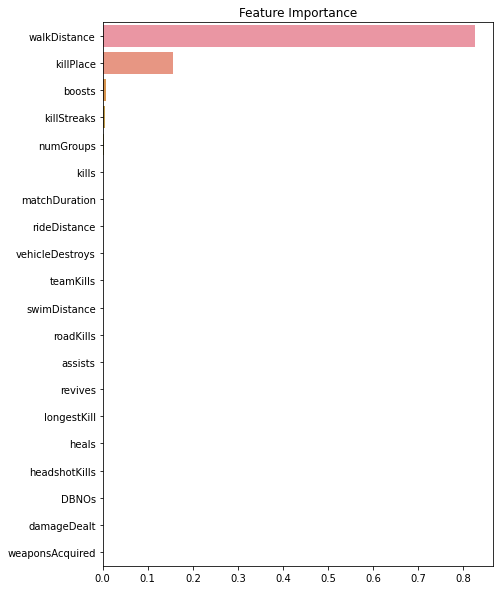

In [ ]:
# 변수중요도 plot
# 어떤 변수가 회귀에 있어서 중요하게 작용하였는지를 그래프로 시각화
ft=dt.feature_importances_
ft=pd.Series(ft,index=X_train.columns)
ft_top=ft.sort_values(ascending=False)

plt.figure(figsize=(7,10))
plt.title('Feature Importance')
sns.barplot(x=ft_top,y=ft_top.index)

In [ ]:
# 실제값과 예측치를 기록한 테이블
comparison_table=pd.DataFrame({'Real':Y_test,'Predict':dt_pred}).sort_index()
comparison_table

,Real,Predict
4,0.5000,0.504353
6,0.7021,0.615201
7,0.0816,0.141356
12,0.6327,0.656146
32,0.0000,0.031332
...,...,...
73486,0.9787,0.826901
73497,0.5417,0.411647
73498,0.4792,0.411647
73501,0.9130,0.861016


In [ ]:
predictions_dt=dt.predict(X_test)
Accuracy = dt.score(X_test,Y_test)
print(Accuracy)

0.86899621795156


PCA DATA

In [ ]:
df_pca = pd.read_csv('/content/drive/MyDrive/pca_data.csv')
df_pca

,Unnamed: 0,pca_component_1,pca_component_2,pca_component_3,pca_component_4,pca_component_5,winPlacePerc
0,0,-1.232874,-0.175091,-1.449326,0.561719,0.357351,0.7755
1,1,9.913616,-3.007299,2.039961,-1.449363,-0.243380,0.9592
2,2,-3.057552,-0.937301,0.407268,-0.288598,-0.194972,0.0000
3,3,-1.697213,0.556755,0.460310,-0.432716,-0.128617,0.4255
4,4,-0.570927,2.039847,1.865367,3.558516,-1.256738,0.5000
...,...,...,...,...,...,...,...
73506,73506,0.696500,-1.182880,0.989715,-0.725822,-0.274276,0.4091
73507,73507,0.943952,-0.250655,-1.031201,-0.155005,-0.292392,0.7021
73508,73508,-2.134897,0.083108,0.456516,-0.250527,0.006439,0.3333
73509,73509,-0.850032,1.583293,0.446399,-0.142699,0.478642,0.5000


In [ ]:
df_pca = df_pca.drop(['Unnamed: 0'],axis = 1)
df_pca

,pca_component_1,pca_component_2,pca_component_3,pca_component_4,pca_component_5,winPlacePerc
0,-1.232874,-0.175091,-1.449326,0.561719,0.357351,0.7755
1,9.913616,-3.007299,2.039961,-1.449363,-0.243380,0.9592
2,-3.057552,-0.937301,0.407268,-0.288598,-0.194972,0.0000
3,-1.697213,0.556755,0.460310,-0.432716,-0.128617,0.4255
4,-0.570927,2.039847,1.865367,3.558516,-1.256738,0.5000
...,...,...,...,...,...,...
73506,0.696500,-1.182880,0.989715,-0.725822,-0.274276,0.4091
73507,0.943952,-0.250655,-1.031201,-0.155005,-0.292392,0.7021
73508,-2.134897,0.083108,0.456516,-0.250527,0.006439,0.3333
73509,-0.850032,1.583293,0.446399,-0.142699,0.478642,0.5000


In [ ]:
data = df_pca

def str_summary(df, pred=None):
  obs = df.shape[0]
  types = df.dtypes
  counts = df.apply(lambda x: x.count())
  uniques = df.apply(lambda x: [x.unique()]).T.squeeze()
  nulls = df.apply(lambda x: x.isnull().sum())
  distincts = df.apply(lambda x: x.unique().shape[0])
  missing_ratio = (df.isnull().sum()/ obs) * 100

  print('Data shape:', df.shape)

  cols = ['Types', 'Counts', 'Distincts', 'Nulls', 'Missing_ratio', 'Uniques']
  structure = pd.concat([types, counts, distincts, nulls, missing_ratio, uniques], axis = 1, sort=True)

  structure.columns = cols

  print('___________________________\nData types:\n',structure.Types.value_counts())
  print('___________________________')

  return structure

data_summary = str_summary(data)
data_summary

Data shape: (73511, 6)
___________________________
Data types:
 float64    6
Name: Types, dtype: int64
___________________________


,Types,Counts,Distincts,Nulls,Missing_ratio,Uniques
pca_component_1,float64,73511,73478,0,0.0,"[-1.2328743590075968, 9.913616319603914, -3.05..."
pca_component_2,float64,73511,73478,0,0.0,"[-0.1750905400326458, -3.0072988223916504, -0...."
pca_component_3,float64,73511,73478,0,0.0,"[-1.4493258938432605, 2.039960829104636, 0.407..."
pca_component_4,float64,73511,73478,0,0.0,"[0.5617193657428737, -1.4493630786713432, -0.2..."
pca_component_5,float64,73511,73478,0,0.0,"[0.3573510925294899, -0.2433798699696505, -0.1..."
winPlacePerc,float64,73511,639,0,0.0,"[0.7755, 0.9592, 0.0, 0.4255, 0.5, 0.5106, 0.7..."


In [ ]:
X=data.drop(['winPlacePerc'],axis=1)
Y=data['winPlacePerc']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=123)

In [ ]:
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)
dt_pred=dt.predict(X_test)

print('----- Regression Result -----\n')
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(Y_test,dt_pred)))
print('Mean Absolute Error: ',mean_absolute_error(Y_test,dt_pred))

----- Regression Result -----

Root Mean Squared Error:  0.12729026211508881
Mean Absolute Error:  0.09282344699374262


In [ ]:
kfold=KFold(n_splits=5)
cv_score=[]

x=X_train.values
y=Y_train.values
model=DecisionTreeRegressor()

n_iter=0
for train_index, test_index in kfold.split(x):
    x_train, x_test=x[train_index],x[test_index]
    y_train, y_test=y[train_index],y[test_index]

    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)

    n_iter=n_iter+1

    acc_train=np.sqrt(mean_squared_error(y_train,y_pred_train))
    acc_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
    cv_score.append(acc_test)

    print("Modeling ",n_iter,"st")
    print('train set RMSE: ',acc_train)
    print('test set RMSE: ',acc_test)
    print("-----------------------------------------")

print('Mean test set RMSE: ',np.mean(cv_score))

Modeling  1 st
train set RMSE:  1.7874207269221235e-18
test set RMSE:  0.1283585499774459
-----------------------------------------
Modeling  2 st
train set RMSE:  2.4172776455425687e-18
test set RMSE:  0.12956590894215875
-----------------------------------------
Modeling  3 st
train set RMSE:  1.6861300154767212e-18
test set RMSE:  0.12998957493910088
-----------------------------------------
Modeling  4 st
train set RMSE:  1.5430611392056302e-18
test set RMSE:  0.12674671050579744
-----------------------------------------
Modeling  5 st
train set RMSE:  2.1866353049973968e-18
test set RMSE:  0.12909859947706653
-----------------------------------------
Mean test set RMSE:  0.12875186876831388


In [ ]:
# 튜닝할 주요 하이퍼 파라미터 정의하고 GridSearchCV를 이용함
# 총 5번의 CV를 통해 평균 테스트셋 오차가 가장 낮을때의 하이퍼 파라미터 조합을 선택함
model=DecisionTreeRegressor()
param={'max_depth':[None,5,8],'min_samples_leaf':[1,2,3],'min_samples_split':[2,3,4]}

grid_model=GridSearchCV(model,param_grid=param, cv=5)
grid_model.fit(X_train,Y_train)

# 최적 하이퍼 파라미터 선정
grid_model.best_params_

{'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 4}

In [ ]:
# 최적 하이퍼 파라미터로 조정후, 전체 데이터셋을 5개로 split하여 전구간에 대해 번갈아가며 일부를 테스트셋으로 사용함
# 교차검증의 방법으로 5개의 테스트셋에대해 돌아가며 rmse를 산출
# 5개의 테스트셋에대해 산출된 rmse의 평균을 평균 testset rmse로 제시
# 해당 교차검증에 의한 최종 rmse를 모델의 실제 성능으로 봐야함

kfold=KFold(n_splits=5)
cv_score=[]

x=X_train.values
y=Y_train.values
model=DecisionTreeRegressor(max_depth=8)

n_iter=0
for train_index, test_index in kfold.split(x):
    x_train, x_test=x[train_index],x[test_index]
    y_train, y_test=y[train_index],y[test_index]

    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)

    n_iter=n_iter+1

    acc_train=np.sqrt(mean_squared_error(y_train,y_pred_train))
    acc_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
    cv_score.append(acc_test)

    print("Modeling ",n_iter,"st")
    print('train set RMSE: ',acc_train)
    print('test set RMSE: ',acc_test)
    print("-----------------------------------------")

print('Mean test set RMSE: ',np.mean(cv_score))

Modeling  1 st
train set RMSE:  0.09677780968796132
test set RMSE:  0.10250152524654733
-----------------------------------------
Modeling  2 st
train set RMSE:  0.09773502203261429
test set RMSE:  0.10228680790754997
-----------------------------------------
Modeling  3 st
train set RMSE:  0.09705803554369077
test set RMSE:  0.10126710897087943
-----------------------------------------
Modeling  4 st
train set RMSE:  0.09777563101997755
test set RMSE:  0.10093422166068694
-----------------------------------------
Modeling  5 st
train set RMSE:  0.09724657445715681
test set RMSE:  0.10250863912726792
-----------------------------------------
Mean test set RMSE:  0.1018996605825863


In [ ]:
# 하이퍼 파라미터가 튜닝된 최종모델로 테스트셋에대해 예측을 진행함
dt=DecisionTreeRegressor(max_depth=5)
dt.fit(X_train,Y_train)
dt_pred=dt.predict(X_test)

print('----- Regression Result -----\n')
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(Y_test,dt_pred)))
print('Mean Absolute Error: ',mean_absolute_error(Y_test,dt_pred))

----- Regression Result -----

Root Mean Squared Error:  0.12172287255042144
Mean Absolute Error:  0.09201418755687267


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, dt_pred)
mse

0.014816457701926142

In [ ]:
# 실제값과 예측치를 기록한 테이블
comparison_table=pd.DataFrame({'Real':Y_test,'Predict':dt_pred}).sort_index()
comparison_table

,Real,Predict
1,0.9592,0.947937
9,0.0000,0.050398
13,0.0000,0.008305
15,0.1957,0.166745
20,0.1702,0.286735
...,...,...
73496,0.8636,0.903850
73498,0.4792,0.537576
73499,0.5000,0.741953
73507,0.7021,0.741953


In [ ]:
predictions_dt=dt.predict(X_test)
Accuracy = dt.score(X_test,Y_test)
print(Accuracy)

0.840021891054423
